Plot representative riverbed profiles on the infiltrability map

In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd
import colorstamps
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D

# Internal imports
import rose 
import utils

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set regime colors
c_negl = '#5a7cb0b3'
c_soft = '#e16e91b3'
c_hard = '#c9aa2ab3'

Compare van Genuchten unsaturated parameters used for near‐surface geological units in numerical simulations (compiled by Muñoz-Vega et al., https://doi.org/10.1029/2025WR040785) with sand and silt distributions obtained from Rosetta3.

In [28]:
# compiled data used in numerical simulations
munoz_data = pd.read_csv('munoz_unsat_ref.csv')

# synthetic distributions
N = 2000
sand = rose.sample_soils('SAND', N)
loam_sand = rose.sample_soils('LOAM_SAND', N)
sand_loam = rose.sample_soils('SAND_LOAM', N)
loam = rose.sample_soils('LOAM', N)
silt_loam = rose.sample_soils('SILT_LOAM', N)
silt = rose.sample_soils('SILT', N)

/tmp/ipykernel_648896/3870011796.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(sand_loam['hg'][:n], sand_loam['n'][:n], c='k',


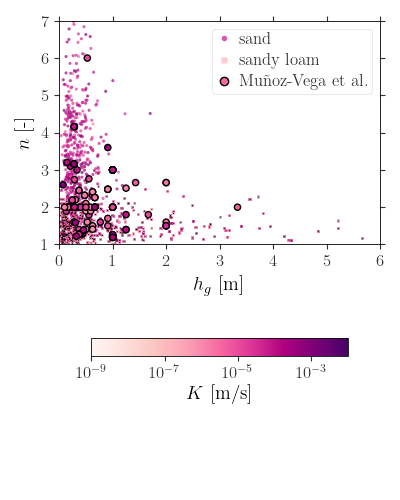

In [31]:
fig, ax = plt.subplots(figsize=(4, 5))

cmap = cm.RdPu
norm = colors.LogNorm(vmin=1e-9, vmax=1e-2)

n = 500
ax.scatter(sand['hg'][:n], sand['n'][:n], c=sand['K'][:n],
           cmap=cmap, norm=norm, marker='o', s=5, ec='None', alpha=0.7)
ax.scatter(sand_loam['hg'][:n], sand_loam['n'][:n], c=sand_loam['K'][:n],
           cmap=cmap, norm=norm, marker='s', s=5, ec='None', alpha=0.7)
ax.scatter(sand_loam['hg'][:n], sand_loam['n'][:n], c='k',
           cmap=cmap, norm=norm, marker='.', s=3, ec='None', alpha=1)
ax.scatter(munoz_data['hg'][:n], munoz_data['n'][:n], c=munoz_data['K'][:n],
           cmap=cmap, norm=norm, marker='o', s=20, ec='k', linewidths=1)

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='linear', yscale='linear')
ax.minorticks_off()

ax.set_xlim(xmin=0, xmax=6)
ax.set_ylim(ymin=1, ymax=7)
ax.set_xlabel('$h_g$ [m]', labelpad=5)
ax.set_ylabel('$n$ [-]', labelpad=5)

cax = ax.inset_axes([0.1, -0.5, 0.8, 0.08])
cb = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
             orientation='horizontal', label='$K$ [m/s]')
cb.minorticks_off()

legend = [
    Line2D([0], [0], color=cmap(0.7), ls='None', marker='o', ms=4, 
           markeredgecolor='None', alpha=0.7, label='sand'),
    Line2D([0], [0], color=cmap(0.3), ls='None', marker='s', ms=4,
           markeredgecolor='None', alpha=0.7, label='sandy loam'),
    Line2D([0], [0], color=cmap(0.5), ls='None', marker='o', ms=6,
           alpha=1, label='Muñoz-Vega et al.')
]
plt.legend(handles=legend, loc='upper right', handlelength=1, handletextpad=0.4,
           fontsize=12)

plt.tight_layout()
plt.savefig(output_path / 'vG_parameter_dist.pdf')

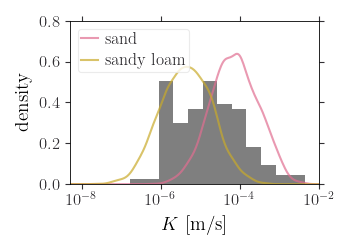

In [32]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

log_Kmin = -9
log_Kmax = -2

n = 300
x = np.linspace(log_Kmin, log_Kmax, n)
delta = (log_Kmax - log_Kmin) / n

X = np.log10(sand['K'])
kde = stats.gaussian_kde(X)
y = kde(x) * X.shape[0]
y /= (y.sum() * delta)
ax.plot(10**x, y, lw=1.5, color='C1', alpha=0.7, label='sand')

X = np.log10(sand_loam['K'])
kde = stats.gaussian_kde(X)
y = kde(x) * X.shape[0]
y /= (y.sum() * delta)
ax.plot(10**x, y, lw=1.5, color='C2', alpha=0.7, label='sandy loam')

n_bins = 20
logbins = np.logspace(log_Kmin, log_Kmax, n_bins)
delta_bins = (log_Kmax - log_Kmin) / n_bins
hist, bins = np.histogram(munoz_data['K'], bins=logbins)
hist = hist / (len(munoz_data['K']) * delta_bins)
ax.stairs(hist, bins, fill=True, color='k', alpha=0.5)


ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='log', yscale='linear')
ax.minorticks_off()

ax.set_xlim(xmin=5e-9, xmax=1e-2)
ax.set_ylim(ymin=0, ymax=0.8)
ax.set_xticks([1e-8, 1e-6, 1e-4, 1e-2])
ax.set_xlabel('$K$ [m/s]', labelpad=5)
ax.set_ylabel('density', labelpad=5)

plt.legend(loc='upper left', handlelength=1, handletextpad=0.4,
           fontsize=12)

plt.tight_layout()
plt.savefig(output_path / 'K_distribution.pdf')

Generate riverbed profiles:

    - with sand or sandy loam, 
    - with wc from Unif(0, 3) [m]
    - with Kc from LogUnif(1e-8, 1e-6) [m/s]

and plot them on the infiltrability map.

[SAND] unclogged fraction: 0.00
[LOAM] unclogged fraction: 0.03


/tmp/ipykernel_648896/2950552817.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


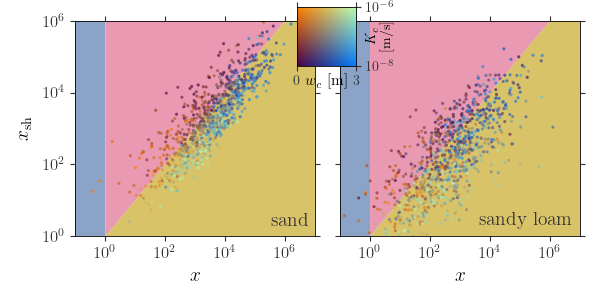

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# generate riverbed profiles
N = 1000
sand = rose.sample_soils('SAND', N)
loam = rose.sample_soils('SAND_LOAM', N)

cl_cond = 10**np.random.uniform(low=-8, high=-6, size=N)
cl_th = np.random.uniform(low=0, high=3, size=N)

# build 2d colormap
norm1 = colors.LogNorm(vmin=1e-8, vmax=1e-6)
norm2 = colors.Normalize(vmin=0, vmax=3)
rgb, stamp = colorstamps.apply_stamp(norm1(cl_cond), norm2(cl_th), 'teuling1f')

# scatter plot for sandy aquifer
_, _, _, x, x_sh = utils.get_Dless_parameters(cl_cond, cl_th, sand['K'],
                                                sand['hg'], sand['n'], 'vGM')
axs[0].scatter(x, x_sh, c=rgb, marker='o', s=5, ec='None', alpha=0.7, zorder=1)
print(f'[SAND] unclogged fraction: {(x_sh <= 1).mean():.2f}')

# scatter plot for loamy aquifer
_, _, _, x, x_sh = utils.get_Dless_parameters(cl_cond, cl_th, loam['K'],
                                                loam['hg'], loam['n'], 'vGM')
axs[1].scatter(x, x_sh, c=rgb, marker='o', s=5, ec='None', alpha=0.7, zorder=1)
print(f'[LOAM] unclogged fraction: {(x_sh <= 1).mean():.2f}')


# background with the regimes
for ax in axs:
    ax.fill_betweenx([1e0, 1e6], [1e-2, 1e-2], x2=[1e0, 1e0], color=c_negl,
                     ec='None', zorder=0)
    ax.fill_between([1e0, 1e10], [1e0, 1e10], y2=[1e10, 1e10], color=c_soft,
                    ec='None', zorder=0)
    ax.fill_between([1e0, 1e10], [1e0, 1e0], y2=[1e0, 1e10], color=c_hard,
                    ec='None', zorder=0)

for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='log', yscale='log')
    ax.minorticks_off()
    ax.set_xlabel('$x$', labelpad=5)
    ax.set_xlim(xmin=1e-1, xmax=1e7)
    ax.set_ylim(ymin=1e0, ymax=1e6)
    ax.set_yticks([1e0, 1e2, 1e4, 1e6], labels=[])
    ax.set_xticks([1e0, 1e2, 1e4, 1e6])

axs[0].set_ylabel('$x_\\mathrm{sh}$', labelpad=8)
axs[0].set_yticklabels(['$10^0$', '$10^2$', '$10^4$', '$10^6$'])

col_ax = stamp.overlay_ax(axs[0], lower_left_corner=[0.87, 1.05], width=0.28)
col_ax.spines["top"].set_visible(True)
col_ax.spines["right"].set_visible(True)
col_ax.tick_params(top=True, right=True)
col_ax.set_xlabel('$w_c$ [m]', labelpad=-10, fontsize=11)
col_ax.set_xticks([0, 1], labels=[0, 3], fontsize=10)
col_ax.set_ylabel('$K_c$\n[m/s]', labelpad=-20, fontsize=10, multialignment='center')
col_ax.set_yticks([0, 1], labels=['$10^{-8}$', '$10^{-6}$'], fontsize=10)
col_ax.yaxis.set_label_position("right")
col_ax.yaxis.tick_right()

axs[0].text(6e6, 2e0, 'sand', horizontalalignment='right', fontsize=14)
axs[1].text(6e6, 2e0, 'sandy loam', horizontalalignment='right', fontsize=14)

plt.tight_layout()
plt.savefig(output_path / 'riverbed_profiles.pdf')